<a href="https://colab.research.google.com/github/wilsonlaww/Fantasy-Sports/blob/main/FantasySports_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description**
Fantasy sports are online gaming platforms where participants draft and manage virtual teams of real professional sports players. Based on the performance of the players in the real world, players are allotted points in the fantasy sports platform every match. The objective is to create the best possible team with a fixed budget to score maximum fantasy points, and users compete against each other over an entire sports league or season. Some of these fantasy sports require actual financial investments for participation, with the chances of winning monetary rewards as well as free matchday tickets on a periodic basis.

The fantasy sports market has seen tremendous growth over the past few years, with a valuation of \\$18.6 billion in 2019. The football (soccer) segment led in terms of market share in 2019, with over 8 million participants worldwide, and is expected to retain its dominance over the next couple of years. Digitalization is one of the primary factors driving the growth of the fantasy sports market as it allows participants the opportunity to compete on a global level and test their skills. With an increase in smartphone usage and availability of fantasy sports apps, this market is expected to witness a globe surge and reach a \\$48.6 billion valuation by 2027.


**Objective:**
OnSports is a fantasy sports platform that has fantasy leagues for many different sports and has witnessed an increasing number of participants globally over the past 5 years. For each player, a price is set at the start, and the price keeps changing over time based on the performance of the players in the real world. With the new English Premier League season about to start, they have collected data from the past season and want to analyze it to determine the price of each player for the start of the new season. OnSports have hired you as a data scientist and asked you to conduct a cluster analysis to identify players of different potentials of each player based on previous season performance. This will help them understand the patterns in player performances and fantasy returns and decide the exact price to be set for each player for the upcoming football season.

In [52]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Overview of the Data**

In [53]:
fantasy = pd.read_csv('/content/drive/MyDrive/ML_DS_Resources/fpl_data.csv')
fantasy.head()

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
1,Alexandre Lacazette,Arsenal,Forward,13,3,129,1916,21,307.4,602.4,797,21,7
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
3,Bukayo Saka,Arsenal,Midfielder,5,5,114,2554,31,650.6,493.0,984,8,8
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2


In [54]:
fantasy['Player_Name'].nunique()

476

In [55]:
fantasy['Club'].value_counts()

,count
Club,
Arsenal,30
Crystal Palace,30
Leeds United,29
West Ham United,29
Tottenham Hotspurs,29
Newcastle United,29
Leicester City,29
Manchester United,28
Chelsea,28


In [56]:
fantasy['Position'].value_counts()

,count
Position,
Midfielder,195
Defender,172
Forward,64
Goalkeeper,45


In [57]:
fantasy[fantasy['Goals_Scored'] == 0]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,Alex Runnarsson,Arsenal,Goalkeeper,0,0,1,15,0,0.0,16.6,0,0,0
2,Bernd Leno,Arsenal,Goalkeeper,0,0,131,3131,37,0.0,702.2,2,11,11
4,Calum Chambers,Arsenal,Defender,0,3,36,751,10,169.4,171.8,77,3,2
5,Cedric Soares,Arsenal,Defender,0,1,28,744,11,114.8,110.8,66,3,2
6,Daniel Ceballos,Arsenal,Midfielder,0,4,62,1609,17,422.3,359.8,141,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,Owen Otasowie,Wolverhampton Wanderers,Midfielder,0,1,9,185,6,25.9,38.2,34,0,0
465,Patrick Cutrone,Wolverhampton Wanderers,Forward,0,0,2,23,0,0.0,0.0,4,0,0
471,Ruben Vinagre,Wolverhampton Wanderers,Defender,0,0,1,172,7,25.3,31.2,0,0,0
472,Rui Pedro Patricio,Wolverhampton Wanderers,Goalkeeper,0,0,132,3330,51,0.0,763.6,0,12,10


In [58]:
fantasy['Goals_Scored'].quantile(.5)

0.5

In [59]:
fantasy.describe()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
count,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000,476.000000
mean,1.907563,1.752101,58.516807,1336.909664,19.157563,195.976050,294.617647,224.962185,4.718487,4.745798
std,3.455562,2.708563,51.293559,1073.773995,15.946171,251.478541,267.779681,318.240377,6.252625,4.394312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,10.000000,268.750000,4.000000,8.300000,46.500000,5.750000,0.000000,0.000000
50%,0.500000,0.000000,48.000000,1269.500000,18.000000,96.950000,233.100000,104.500000,2.000000,4.000000
75%,2.000000,2.000000,94.250000,2256.250000,31.000000,296.950000,499.500000,298.250000,7.000000,8.000000
max,23.000000,14.000000,244.000000,3420.000000,68.000000,1414.900000,1318.200000,1980.000000,40.000000,19.000000


**Univariate and Bivariate Analysis**

<Axes: xlabel='Goals_Scored', ylabel='Count'>

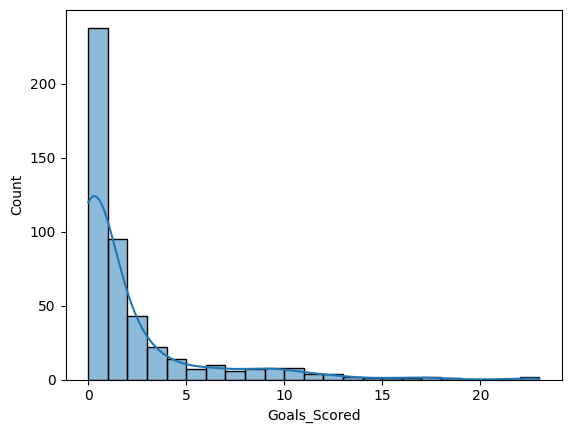

In [60]:
sns.histplot(data = fantasy, x = 'Goals_Scored', kde = True, bins = 23)

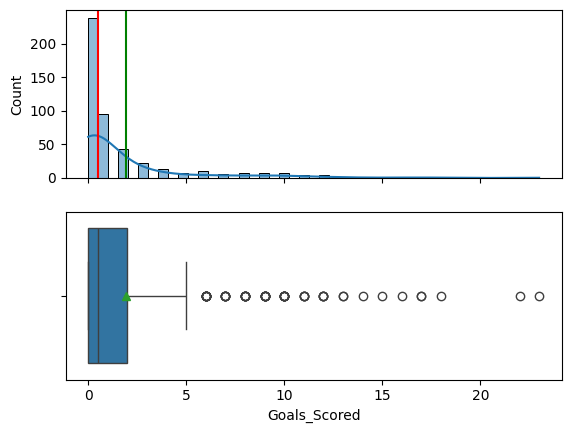

In [61]:
fig, ax = plt.subplots(2,1, sharex = True)
sns.histplot(data = fantasy, x = 'Goals_Scored', kde = True, ax = ax[0])
sns.boxplot(data = fantasy, x = 'Goals_Scored', ax = ax[1], showmeans = True)
ax[0].axvline(fantasy['Goals_Scored'].median(), color = 'red')
ax[0].axvline(fantasy['Goals_Scored'].mean(), color = 'green')


**Create a function that will graph a histogram and boxplot for each feature**

In [62]:
def hist_box(df, feature, bins = 12):
  fig, ax = plt.subplots(2,1, sharex = True)
  sns.histplot(data = fantasy, x = feature, kde = True, ax = ax[0])
  sns.boxplot(data = fantasy, x = feature, ax = ax[1], showmeans = True)
  ax[0].axvline(fantasy[feature].median(), color = 'red')
  ax[0].axvline(fantasy[feature].mean(), color = 'green')

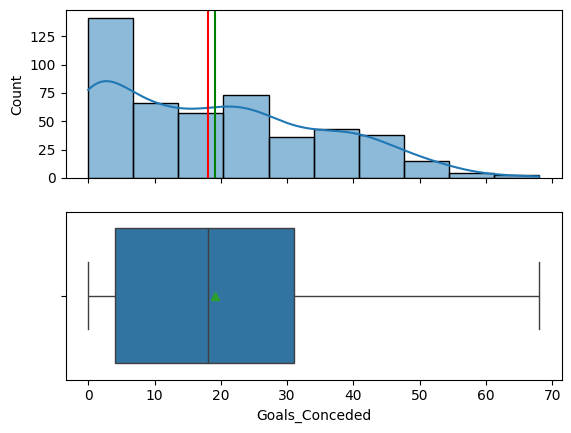

In [63]:
hist_box(fantasy, 'Goals_Conceded', bins = 14)

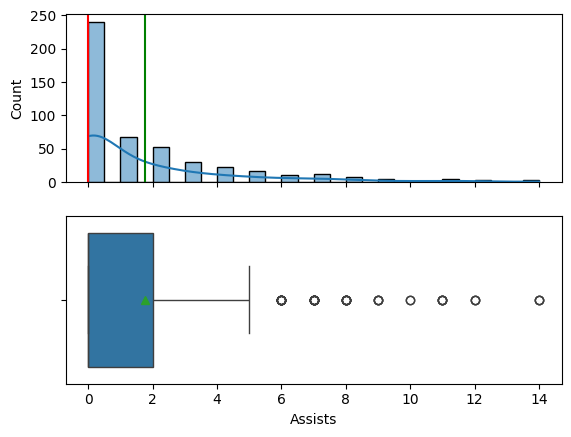

In [64]:
hist_box(fantasy, 'Assists')

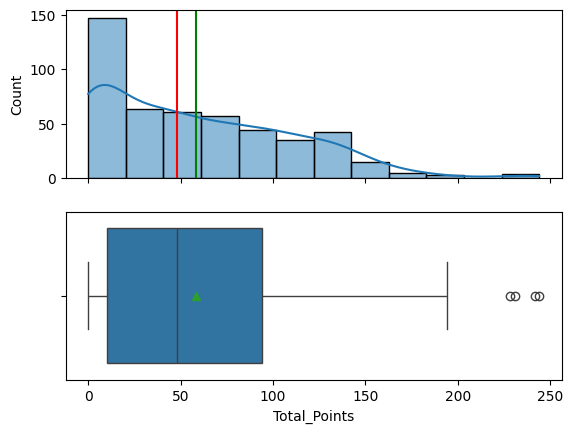

In [65]:
hist_box(fantasy, 'Total_Points')

In [66]:
fantasy[fantasy['Total_Points'] > 180]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
36,Emiliano Martinez,Aston Villa,Goalkeeper,0,0,186,3420,46,20.0,1067.2,0,27,15
219,Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.0,867.2,1512,26,10
238,Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.6,819.2,1306,23,8
269,Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.7,1056.0,1980,21,11
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.9,1052.2,1046,26,13


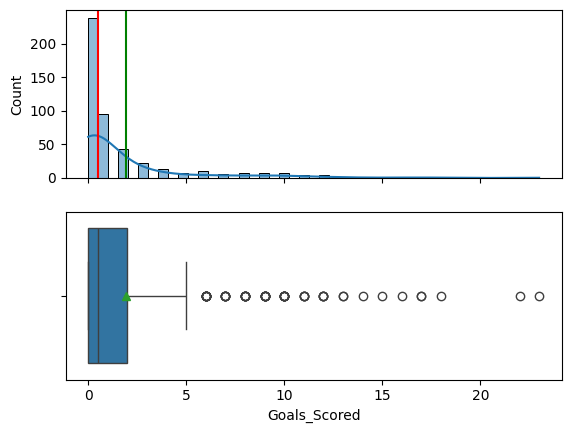

In [67]:
hist_box(fantasy, 'Goals_Scored')

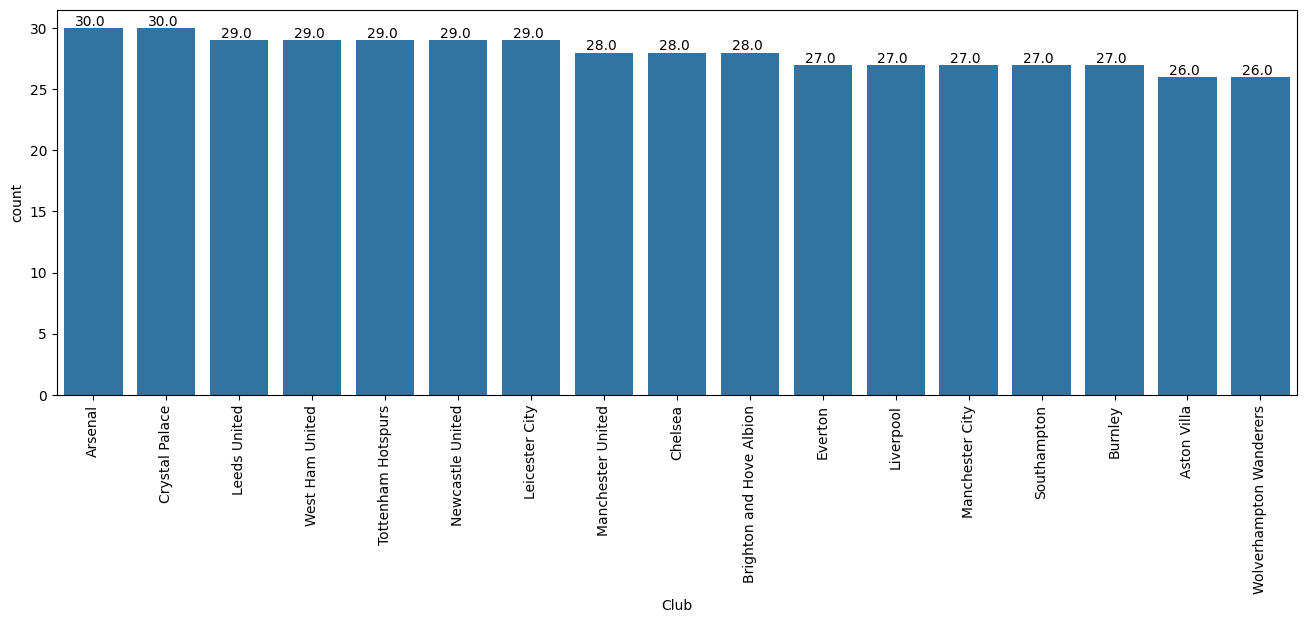

In [68]:
plt.figure(figsize=(16, 5))
ax = sns.countplot(data=fantasy, x='Club', order=fantasy.groupby(['Club'])['Player_Name'].count().sort_values(ascending=False).index)
plt.xticks(rotation=90)

#display the values on top of each bar
for i in range(len(ax.patches)):
    x = ax.patches[i].get_x() + ax.patches[i].get_width() / 2 - 0.25
    y = ax.patches[i].get_height() + 0.2
    ax.annotate(ax.patches[i].get_height(), (x, y))


**Bivariate**

In [69]:
#Filter out non-numeric data types because they are not comparable
numeric_df = fantasy.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                Goals_Scored   Assists  Total_Points   Minutes  \
Goals_Scored        1.000000  0.658168      0.696172  0.436865   
Assists             0.658168  1.000000      0.701306  0.519280   
Total_Points        0.696172  0.701306      1.000000  0.908206   
Minutes             0.436865  0.519280      0.908206  1.000000   
Goals_Conceded      0.381064  0.449536      0.801821  0.940025   
Creativity          0.554242  0.825242      0.709679  0.613385   
Influence           0.597638  0.591190      0.955050  0.938259   
Threat              0.903802  0.748933      0.723896  0.524276   
Bonus               0.738927  0.666646      0.867282  0.676415   
Clean_Sheets        0.434619  0.520733      0.894135  0.917858   

                Goals_Conceded  Creativity  Influence    Threat     Bonus  \
Goals_Scored          0.381064    0.554242   0.597638  0.903802  0.738927   
Assists               0.449536    0.825242   0.591190  0.748933  0.666646   
Total_Points          0.801821    0.709679

<Axes: >

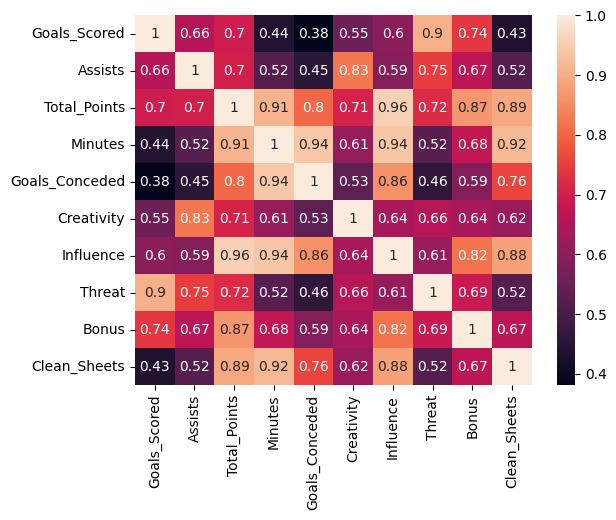

In [70]:
sns.heatmap(correlation_matrix, annot = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Manchester City'),
  Text(1, 0, 'Chelsea'),
  Text(2, 0, 'Liverpool'),
  Text(3, 0, 'Aston Villa'),
  Text(4, 0, 'Manchester United'),
  Text(5, 0, 'Tottenham Hotspurs'),
  Text(6, 0, 'Everton'),
  Text(7, 0, 'Leeds United'),
  Text(8, 0, 'West Ham United'),
  Text(9, 0, 'Leicester City'),
  Text(10, 0, 'Wolverhampton Wanderers'),
  Text(11, 0, 'Arsenal'),
  Text(12, 0, 'Southampton'),
  Text(13, 0, 'Brighton and Hove Albion'),
  Text(14, 0, 'Burnley'),
  Text(15, 0, 'Crystal Palace'),
  Text(16, 0, 'Newcastle United')])

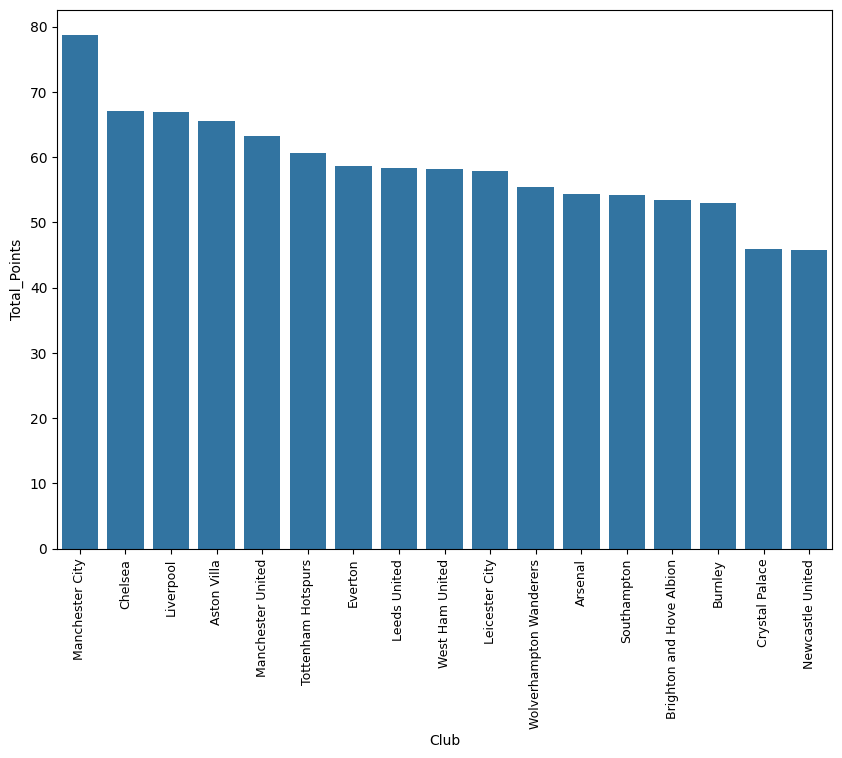

In [71]:
plt.figure(figsize=(10, 7))
sns.barplot(data=fantasy, x='Club', y='Total_Points', ci=None, order=fantasy.groupby(['Club'])['Total_Points'].mean().sort_values(ascending=False).index)
plt.xticks(rotation=90, size=9)

Which players scored the most fantasy points for each position?

In [72]:
fantasy.groupby(['Position'])['Total_Points'].max()

,Total_Points
Position,
Defender,171
Forward,242
Goalkeeper,186
Midfielder,244


In [73]:
midfield = fantasy[fantasy['Position']== 'Midfielder']
top_midfielders = midfield.sort_values(by = 'Total_Points', ascending = False)
top_midfielders.head(3)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
315,Bruno Fernandes,Manchester United,Midfielder,18,14,244,3101,36,1414.9,1292.6,1253,36,13
269,Mohamed Salah,Liverpool,Midfielder,22,6,231,3077,41,825.7,1056.0,1980,21,11
405,Heung-Min Son,Tottenham Hotspurs,Midfielder,17,11,228,3119,36,1049.9,1052.2,1046,26,13


In [74]:
forward = fantasy[fantasy['Position']=="Forward"]
top_forwards = forward.sort_values(by='Total_Points', ascending = False)
top_forwards.head(3)

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
403,Harry Kane,Tottenham Hotspurs,Forward,23,14,242,3083,39,659.1,1318.2,1585,40,12
219,Patrick Bamford,Leeds United,Forward,17,11,194,3052,50,371.0,867.2,1512,26,10
238,Jamie Vardy,Leicester City,Forward,15,14,187,2838,44,356.6,819.2,1306,23,8


**Scale the Data**

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#calculates the mean and standard deviation to be used to scale the data
scaler.fit(numeric_df)
scaled_df = scaler.transform(numeric_df)

In [76]:
#Transform to pandas data frame instead of nupy
scaled_df = pd.DataFrame(scaled_df, columns = numeric_df.columns)
scaled_df

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510
...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909


In [77]:
#Explanation of how the data was scaled:
#ex for the goals column
(fantasy['Goals_Scored'] - fantasy['Goals_Scored'].mean() / fantasy['Goals_Scored'].std() )

,Goals_Scored
0,-0.552027
1,12.447973
2,-0.552027
3,4.447973
4,-0.552027
...,...
471,-0.552027
472,-0.552027
473,-0.552027
474,0.447973


**PCA, Principal Analysis Component (which components or features are irrelevant)**

In [78]:
from sklearn.decomposition import PCA
# .shape[1] returns the 2nd element in the tuple, which is columns. row is the 1st element
#random state makes results reproducible
pca = PCA(n_components = scaled_df.shape[1], random_state = 0)

#computes the principal components and the amount of variance explained by each component
pca.fit(scaled_df)

#projects the original data onto these principal components, results in less dimensions
pca_df = pca.transform(scaled_df)
pca_df

array([[-2.91660039e+00,  5.69939118e-01, -4.18712595e-02, ...,
         6.47566658e-02, -5.74859356e-02, -6.26943054e-03],
       [ 3.81546834e+00,  1.99955411e+00, -2.21634470e+00, ...,
        -2.93053163e-01, -7.53558084e-02,  2.38019311e-01],
       [ 1.94339593e+00, -2.75744591e+00, -9.58237952e-01, ...,
         1.38392431e-01,  3.06182535e-01,  1.36656097e-01],
       ...,
       [-1.96663002e+00,  4.69243202e-01,  4.74988602e-01, ...,
         1.29321223e-01,  2.67968759e-01,  1.72718624e-02],
       [-8.17999711e-01,  1.80940456e-01,  1.03095534e-01, ...,
        -3.00399145e-01,  7.70535354e-04,  6.88056996e-02],
       [ 2.61543522e-01, -1.03286940e+00, -4.17138579e-01, ...,
         1.12067963e-01, -2.90157536e-02, -2.17703985e-03]])

In [79]:
pca_df = pd.DataFrame(pca_df)
pca_df
#values indicates how much a data point contributes to a particular principal component.
#Larger absolute values means it plays a more significant role in the variance

,0,1,2,3,4,5,6,7,8,9
0,-2.916600,0.569939,-0.041871,0.190663,0.003485,0.008158,-0.042314,0.064757,-0.057486,-0.006269
1,3.815468,1.999554,-2.216345,0.757341,-0.119000,-0.541975,-0.233941,-0.293053,-0.075356,0.238019
2,1.943396,-2.757446,-0.958238,0.816920,0.041188,0.376978,0.005235,0.138392,0.306183,0.136656
3,3.502427,1.043441,0.581995,-0.969567,0.415848,-0.358456,0.661746,0.376272,0.260200,0.155934
4,-1.153639,0.422189,0.642307,0.269271,-0.271583,0.405367,-0.033575,0.098886,0.035234,0.034877
...,...,...,...,...,...,...,...,...,...,...
471,-2.686929,0.350179,0.012579,-0.028976,-0.226985,-0.079117,-0.016498,-0.025886,-0.114191,-0.056974
472,2.333559,-3.137873,-1.051056,0.486420,-0.652311,0.294376,0.067490,0.094238,0.214251,-0.007010
473,-1.966630,0.469243,0.474989,-0.098289,-0.221093,-0.163924,-0.057647,0.129321,0.267969,0.017272
474,-0.818000,0.180940,0.103096,-0.112637,0.423414,-0.064093,0.399416,-0.300399,0.000771,0.068806


In [80]:
#This is the percentage of representation fpr each column. 1st column has 72% representation, etc..
pca_df.var()/sum(pca_df.var())

,0
0,0.721489
1,0.136593
2,0.058800
3,0.031384
4,0.022745
5,0.015227
6,0.007008
7,0.003937
8,0.001945
9,0.000870


**Columns 1 and 2, or the first 2 features have the highest variance**

**K means Clustering**

In [81]:
from sklearn.cluster import KMeans
#Initialize K-Means cluster model with 3 clusters
model = KMeans(n_clusters = 3)
#Fit the KMeans model into pca_df data
model.fit(pca_df)

KMeans(n_clusters=3)

In [82]:
#Assigns each data point to a cluster
model.predict(pca_df)

array([0, 1, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0,
       2, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0,
       0, 2, 2, 1, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2, 2,
       0, 2, 2, 2, 1, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0,
       0, 1, 0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1,
       1, 0, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 2, 1,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 2, 0,
       2, 2, 1, 1, 1, 2, 1, 2, 0, 0, 0, 0, 2, 1, 1,

<Axes: xlabel='0', ylabel='1'>

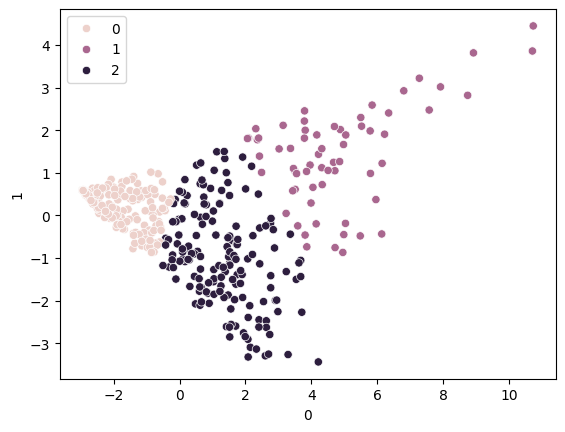

In [83]:
#x represents the first feature, y represents the second feature.
#We only take 2 features because they have the highest variance
sns.scatterplot(x = pca_df.iloc[:,0], y = pca_df.iloc[:,1], hue = model.predict(pca_df))

**K-Elbow Method**

In [84]:
#This library finds the distance of each data point from the cluster center
from scipy.spatial.distance import cdist

#Set the range of possible clusters from 1-10
clusters_ = range(1,10)
#Distortion is how well each number of clusters works. Uses distances of each point for each number of cluster
distortion = [ ]


for k in clusters_:
  model = KMeans(n_clusters = k)
  model.fit(pca_df)
  Y = model.predict(pca_df)

#finds the sum of the minimum distance of every data point from the cluster center
  dist = sum(np.min(cdist(pca_df, model.cluster_centers_), axis = 1))
#Normalize the data by dividing by the number of data points
  dist /=pca_df.shape[0]
#Append each number of cluster's distortion to distortion list
  distortion.append(dist)




In [85]:
distortion

[2.773037110097803,
 1.863573678589826,
 1.5612774038101604,
 1.5055583096718312,
 1.2924554544010316,
 1.2270360428651215,
 1.1575273739150311,
 1.1495873697821335,
 1.0601350213538205]

Text(0.5, 1.0, 'Elbow Analysis')

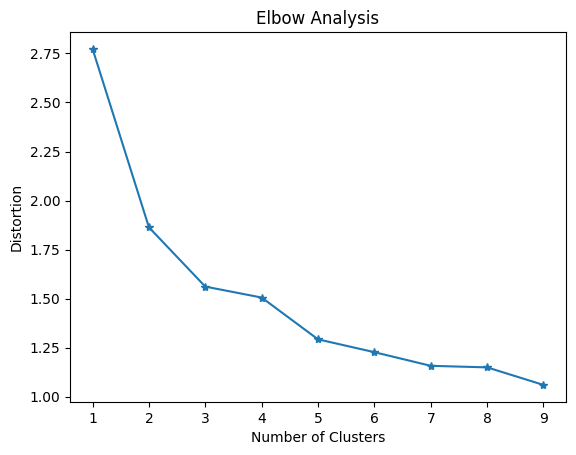

In [86]:
plt.plot(clusters_, distortion, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.title('Elbow Analysis')

<Axes: xlabel='0', ylabel='1'>

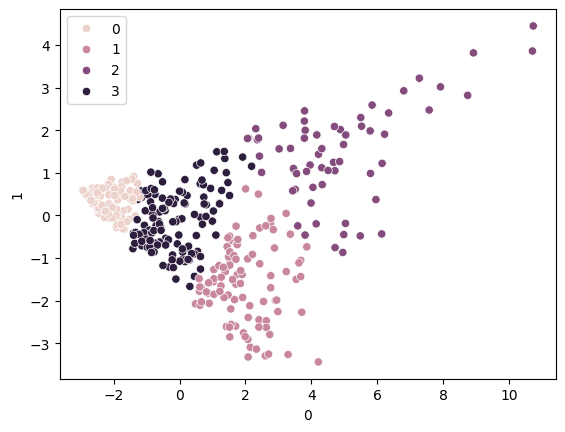

In [87]:
#We see the optimal number of clusters is 4
model = KMeans(n_clusters = 4)
model.fit(pca_df)
sns.scatterplot(x = pca_df.iloc[:,0], y = pca_df.iloc[:,1], hue = model.predict(pca_df))

**Now we know # of clusters, we will look at the data table with points assigned to each cluster**

In [88]:
#Create a copy of the scaled data
df_kmeans = scaled_df.copy()

#Add a new column titled labels and assign each row to a cluster
df_kmeans['Label'] = model.labels_
df_kmeans

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Label
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,0
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,2
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,1
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,2
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,3
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,0
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,1
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,0
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,3


In [89]:
#Shows the mean of each element in each group by creating a Cluster Profile
cluster_kmeans = df_kmeans.groupby(['Label']).mean()
cluster_kmeans

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Label,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891
1,-0.155400,0.011607,0.868140,1.246804,1.160867,0.242723,1.063658,-0.083904,0.439546,1.194592
2,2.031267,1.832261,1.623918,1.045450,0.897337,1.708809,1.371375,1.999696,1.857828,1.042620
3,-0.116945,-0.054496,-0.048362,0.052046,0.088897,-0.030321,-0.088969,-0.005368,-0.218041,-0.009197


In [90]:
#This shows the highest performing cluster group in the data
cluster_kmeans.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Label,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891
1,-0.155400,0.011607,0.868140,1.246804,1.160867,0.242723,1.063658,-0.083904,0.439546,1.194592
2,2.031267,1.832261,1.623918,1.045450,0.897337,1.708809,1.371375,1.999696,1.857828,1.042620
3,-0.116945,-0.054496,-0.048362,0.052046,0.088897,-0.030321,-0.088969,-0.005368,-0.218041,-0.009197


In [91]:
#Worst performing cluster group
cluster_kmeans.style.highlight_min(color = 'red')

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Label,,,,,,,,,,
0,-0.509462,-0.572851,-0.950286,-1.023786,-0.955887,-0.667973,-0.940016,-0.612500,-0.689862,-0.953891
1,-0.155400,0.011607,0.868140,1.246804,1.160867,0.242723,1.063658,-0.083904,0.439546,1.194592
2,2.031267,1.832261,1.623918,1.045450,0.897337,1.708809,1.371375,1.999696,1.857828,1.042620
3,-0.116945,-0.054496,-0.048362,0.052046,0.088897,-0.030321,-0.088969,-0.005368,-0.218041,-0.009197


**K-Medoids** is similar to K-Means, but the cluster center has to be a data point. K-Medoids selects actual data points as medoids, which requires you to understand these points in the original data space to interpret the clusters meaningfully. In contrast, K-Means calculates centroids as the mean of data points, which does not necessarily require interpretation in the original feature space, unless needed for specific analysis or clarity.

In [92]:
!pip install scikit-learn-extra

In [93]:
from sklearn_extra.cluster import KMedoids

In [94]:
#Initialize the model with 4 clusters
model_kmedoids = KMedoids(n_clusters = 4, random_state = 0)
#Fit the model with the PCA data
model_kmedoids.fit(pca_df)
model_kmedoids

KMedoids(n_clusters=4, random_state=0)

In [95]:
#Pandas Data Frame the cluster centers
pd.DataFrame(model_kmedoids.cluster_centers_)

,0,1,2,3,4,5,6,7,8,9
0,3.510462,0.613016,0.517543,0.416560,0.191936,-0.405614,-0.116210,-0.279499,0.004610,-0.033056
1,1.672802,-1.977894,-0.210775,0.195068,0.267424,0.657495,0.063915,0.153208,-0.127187,0.002233
2,-0.602559,0.081585,0.174035,-0.050390,0.372458,-0.167053,0.230252,-0.107574,0.052573,-0.026930
3,-2.879568,0.536520,-0.041019,0.160248,-0.023890,0.007384,-0.032287,0.029865,-0.025391,-0.016262


In [96]:
#First transforms the PCA transformed space back to standard featured space, back to the original number of features
#Secondly, it transforms the standardized dataset back to the original scale, ie. back to minutes and number of goals
pd.DataFrame(scaler.inverse_transform(pca.inverse_transform(model_kmedoids.cluster_centers_)), columns = numeric_df.columns)

#Now, these trained medoid centers show each row represents a player and their stats are shown in each columns.

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
0,6.000000e+00,5.000000e+00,122.0,2244.0,29.0,644.2,530.6,5.100000e+02,1.300000e+01,1.000000e+01
1,-2.886580e-15,2.000000e+00,100.0,2683.0,35.0,84.3,610.4,1.520000e+02,7.000000e+00,1.100000e+01
2,1.000000e+00,1.000000e+00,48.0,1108.0,14.0,210.6,170.6,2.350000e+02,3.000000e+00,5.000000e+00
3,2.220446e-16,1.998401e-15,3.0,45.0,1.0,1.0,11.6,2.557954e-13,8.881784e-16,-8.881784e-16


In [97]:
#With the original data, we can find who these players are
fantasy[(fantasy['Goals_Scored'] == 6) & (fantasy['Total_Points'] == 122)]

,Player_Name,Club,Position,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
179,Gylfi Sigurdsson,Everton,Midfielder,6,5,122,2244,29,644.2,530.6,510,13,10


In [98]:
#Create a copy of scaled_df
df_kmedoids = scaled_df.copy()
#Add new column 'Label' and fill it with a label of which cluster each player belongs to
df_kmedoids['Label'] = model_kmedoids.labels_
df_kmedoids

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Label
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,3
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,0
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,1
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,0
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,2
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,3
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,1
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,3
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,2


In [99]:
#Create a cluster profile
cluster_profile = df_kmedoids.groupby(['Label']).mean()
cluster_profile

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Label,,,,,,,,,,
0,1.623622,1.642087,1.458384,1.039798,0.922576,1.619838,1.237526,1.637089,1.577746,1.021918
1,-0.242936,-0.243982,0.800394,1.213155,1.097003,-0.045353,1.051225,-0.184422,0.363432,1.181229
2,-0.164930,-0.071433,-0.145264,-0.062330,-0.011276,-0.061769,-0.194504,-0.068760,-0.290435,-0.122996
3,-0.523808,-0.606490,-0.991029,-1.066263,-0.991561,-0.704564,-0.973574,-0.636522,-0.710494,-0.993198


In [100]:
#Highlight the top performing group
cluster_profile.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Label,,,,,,,,,,
0,1.623622,1.642087,1.458384,1.039798,0.922576,1.619838,1.237526,1.637089,1.577746,1.021918
1,-0.242936,-0.243982,0.800394,1.213155,1.097003,-0.045353,1.051225,-0.184422,0.363432,1.181229
2,-0.164930,-0.071433,-0.145264,-0.062330,-0.011276,-0.061769,-0.194504,-0.068760,-0.290435,-0.122996
3,-0.523808,-0.606490,-0.991029,-1.066263,-0.991561,-0.704564,-0.973574,-0.636522,-0.710494,-0.993198


In [101]:
#Highlight the worst performing group
cluster_profile.style.highlight_min(color = 'red')

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Label,,,,,,,,,,
0,1.623622,1.642087,1.458384,1.039798,0.922576,1.619838,1.237526,1.637089,1.577746,1.021918
1,-0.242936,-0.243982,0.800394,1.213155,1.097003,-0.045353,1.051225,-0.184422,0.363432,1.181229
2,-0.164930,-0.071433,-0.145264,-0.062330,-0.011276,-0.061769,-0.194504,-0.068760,-0.290435,-0.122996
3,-0.523808,-0.606490,-0.991029,-1.066263,-0.991561,-0.704564,-0.973574,-0.636522,-0.710494,-0.993198


**Hierarchiel Clustering** builds a tree, or a dendogram. **Agglomerative **(bottom-up) starts with each data point as its own cluster, and merges them
**Divisive ** (top-bottom) starts with all data points as one cluster, and splits them.

In [104]:
from sklearn.cluster import AgglomerativeClustering

#Affinity is how you want distances to be computed, in this case euclidian
#Linkage is to see the distance between two subclusters, in this case is complete to get maximum distance
model_agg = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'complete')
model_agg.fit(pca_df)
model_agg

AgglomerativeClustering(linkage='complete', n_clusters=4)

<Axes: xlabel='0', ylabel='1'>

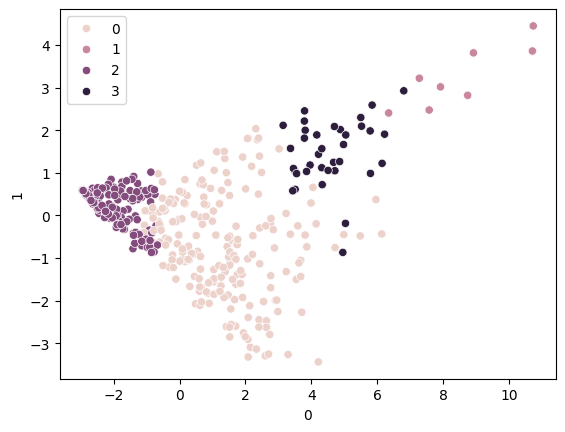

In [105]:
sns.scatterplot(data = pca_df, x = 0, y = 1, hue = model_agg.labels_)


In [106]:
#Same scaled data with label column from before
df_agg = scaled_df.copy()
df_agg['Label'] = model_agg.labels_
#Same cluster profile from before
profile_agg = df_agg.groupby(['Label']).mean()
profile_agg

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Label,,,,,,,,,,
0,-0.006329,0.151459,0.539433,0.712591,0.671089,0.320806,0.586843,0.076662,0.305044,0.661053
1,4.589442,3.279317,2.905137,1.605111,1.394743,2.004162,2.621353,3.948614,3.467231,1.538650
2,-0.475617,-0.544337,-0.860796,-0.895832,-0.816094,-0.630182,-0.846282,-0.568382,-0.659519,-0.863578
3,1.950018,1.744500,1.515967,1.010825,0.807953,1.569384,1.212964,2.180359,1.517111,1.127333


In [107]:
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from scipy.spatial.distance import pdist

In [108]:
z = linkage(pca_df, method = 'ward', metric = 'euclidean')
pd.DataFrame(z, columns = ['Node 1', 'Node 2', 'Distance', 'Group Size'])
#69 and 335 are the closest nodes with a distance if 0, they will create a group size of 2
#It then becomes a new point with a number of 476. 476 then combines with 396 to become a group of 3, and so on and so on
#All data points combine to become 476

,Node 1,Node 2,Distance,Group Size
0,16.0,17.0,0.000000,2.0
1,26.0,476.0,0.000000,3.0
2,28.0,477.0,0.000000,4.0
3,38.0,478.0,0.000000,5.0
4,43.0,479.0,0.000000,6.0
...,...,...,...,...
470,941.0,944.0,16.408447,68.0
471,938.0,946.0,20.578843,76.0
472,943.0,945.0,25.014456,209.0
473,947.0,948.0,44.810053,285.0


In [109]:
#pdist(pca_df) computes the distances between all pairs of points in pca_df
#cophenet calulates 2 things: c and c_dist
#c is Cophenetic correlation coefficient, tells you how well the dendrogram preserves the original pairwise distances.
#The closer c is to 1, the better
#c_dist is the distances between all pairs of points as represented in the clustering dendrogram.
c, c_dist = cophenet(z, pdist(pca_df))
print(c)
print(c_dist)

0.577773844586155
[63.94973615 63.94973615 63.94973615 ... 63.94973615 63.94973615
  6.72678459]


In [110]:
#We now find which combination provides the best c, cophenetic correlation coeffiecient
distance_ = ['euclidean', 'chebyshev', 'mahalanobis']
linkage_ = ['single', 'complete', 'average']

#Initialize c to be a very small value
c_max = -float('inf')

for i in distance_:
  for j in linkage_:

    z = linkage(pca_df, metric = i, method = j)
    c, c_dist = cophenet(z, pdist(pca_df))

    if c > c_max:
      c_max = c
      idx_max = (i, j)
print(c_max)
print(idx_max)

0.8476499945585416
('euclidean', 'average')


In [111]:
#Ward only works with Euclidean, so we have to retest ward
distance_ = ['euclidean']
linkage_ = ['single', 'complete', 'average', 'ward']

c_max = -float('inf')

for i in distance_:
  for j in linkage_:

    z = linkage(pca_df, metric = i, method = j)
    c, c_dist = cophenet(z, pdist(pca_df))

    if c > c_max:
      c_max = c
      idx_max = (i, j)
print(c_max)
print(idx_max)

0.8476499945585416
('euclidean', 'average')


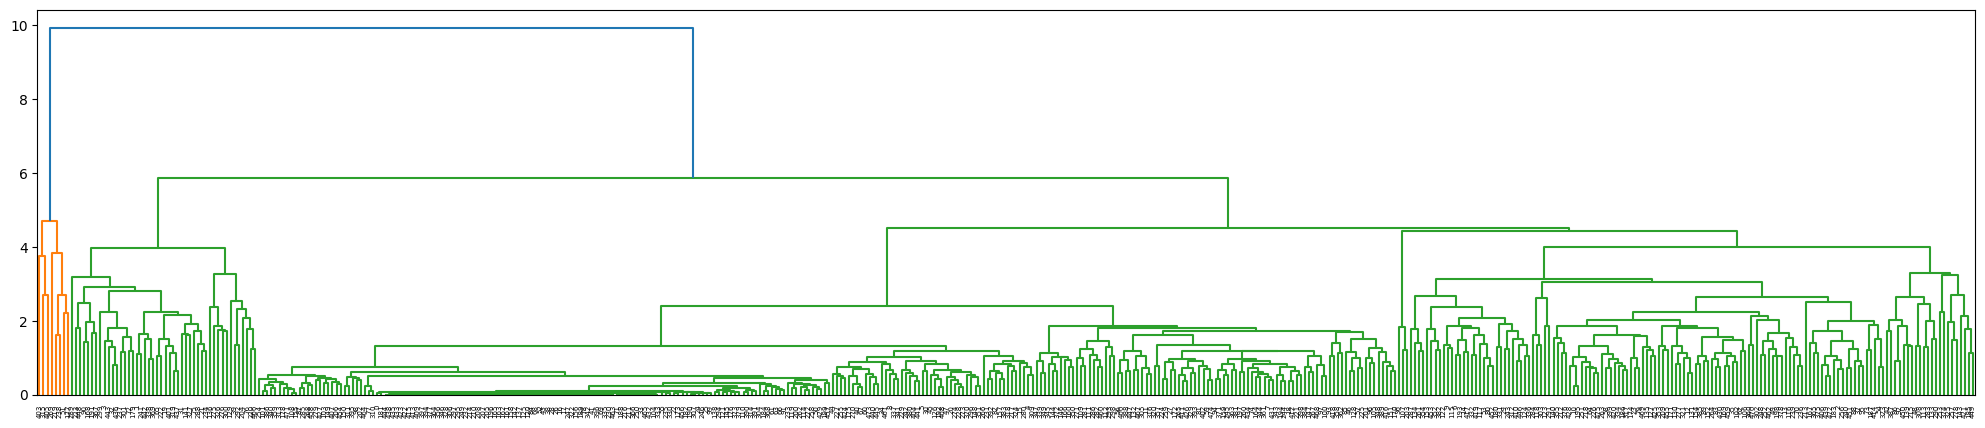

In [112]:
#We find that Euclidean and average has the best c value
#metric is set to euclidean, method is set to average
z = linkage(pca_df, metric = idx_max[0], method = idx_max[1])
plt.figure(figsize = (25, 5))
dendrogram(z);


**Gaussian Mixture Model** (soft clustering) data points can belong to multiple clusters. Used when clusters are not clearly separated such as image segmentationg

In [113]:
from sklearn.mixture import GaussianMixture


In [114]:
model_gmm = GaussianMixture(n_components = 4, random_state = 0)
model_gmm.fit(pca_df)

GaussianMixture(n_components=4, random_state=0)

In [115]:
#Create a copy of scaled data from before
df_gmm = scaled_df.copy()
#Add label column, we need to call predict first to convert probability of being in the cluster to hard cluster assignments
df_gmm['Label'] = model_gmm.predict(pca_df)
df_gmm

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets,Label
0,-0.552608,-0.647555,-1.122506,-1.232383,-1.202653,-0.780115,-1.039325,-0.707638,-0.755435,-1.081123,1
1,3.213401,0.461208,1.375560,0.539871,0.115663,0.443542,1.150596,1.799393,2.606688,0.513521,0
2,-0.552608,-0.647555,1.414592,1.672585,1.120094,-0.780115,1.523682,-0.701346,1.005677,1.424747,2
3,0.895857,1.200384,1.082818,1.134662,0.743432,1.809706,0.741621,2.387618,0.525374,0.741328,0
4,-0.552608,0.461208,-0.439441,-0.546229,-0.574884,-0.105790,-0.459134,-0.465428,-0.275132,-0.625510,2
...,...,...,...,...,...,...,...,...,...,...,...
471,-0.552608,-0.647555,-1.122506,-1.086016,-0.763215,-0.679404,-0.984745,-0.707638,-0.755435,-1.081123,1
472,-0.552608,-0.647555,1.434108,1.858107,1.998971,-0.780115,1.753217,-0.707638,1.165778,1.196940,2
473,-0.552608,-0.277967,-0.634602,-0.771839,-0.700438,-0.067576,-0.802314,-0.481156,-0.755435,-1.081123,2
474,-0.262915,-0.277967,-0.361377,-0.215271,-0.386553,-0.119723,-0.766426,0.097632,-0.275132,0.057909,2


In [116]:
profile_gmm = df_gmm.groupby('Label').mean()
profile_gmm

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Label,,,,,,,,,,
0,0.887166,0.971240,0.879850,0.699160,0.678144,1.100427,0.671774,0.947380,0.855182,0.590975
1,-0.552608,-0.647555,-1.052078,-1.120496,-1.051170,-0.742336,-1.023342,-0.682313,-0.739193,-1.016743
2,-0.293064,-0.281312,0.082814,0.278450,0.271611,-0.213456,0.175596,-0.264850,-0.102715,0.244483
3,3.077075,3.200507,2.288226,1.363234,1.013004,2.327848,2.072779,3.409008,2.305321,1.598951


In [117]:
profile_gmm.style.highlight_max()

,Goals_Scored,Assists,Total_Points,Minutes,Goals_Conceded,Creativity,Influence,Threat,Bonus,Clean_Sheets
Label,,,,,,,,,,
0,0.887166,0.971240,0.879850,0.699160,0.678144,1.100427,0.671774,0.947380,0.855182,0.590975
1,-0.552608,-0.647555,-1.052078,-1.120496,-1.051170,-0.742336,-1.023342,-0.682313,-0.739193,-1.016743
2,-0.293064,-0.281312,0.082814,0.278450,0.271611,-0.213456,0.175596,-0.264850,-0.102715,0.244483
3,3.077075,3.200507,2.288226,1.363234,1.013004,2.327848,2.072779,3.409008,2.305321,1.598951
